# Visualization Results

In [3]:
raw_results = {
  "gpt-4o-mini": {
    "wins": "2",
    "losses": "22",
    "draws": "6",
    "stats": {
      "missedWins": "5",
      "missedBlocks": "16",
      "invalidMoves": "2"
    }
  },
  "gpt-4o": {
    "wins": "0",
    "losses": "28",
    "draws": "2",
    "stats": {
      "missedWins": "2",
      "missedBlocks": "24",
      "invalidMoves": "13"
    }
  },
  "gpt-4.5-preview": {
    "wins": "3",
    "losses": "21",
    "draws": "6",
    "stats": {
      "missedWins": "1",
      "missedBlocks": "16",
      "invalidMoves": "2"
    }
  },
}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Convert the main results to a DataFrame
results_df = pd.DataFrame.from_dict(raw_results, orient='index')

# Convert string values to integers
for col in ['wins', 'losses', 'draws']:
    results_df[col] = results_df[col].astype(int)

# Calculate total games and percentages
results_df['total_games'] = results_df['wins'] + results_df['losses'] + results_df['draws']
results_df['win_percentage'] = (results_df['wins'] / results_df['total_games'] * 100).round(1)
results_df['loss_percentage'] = (results_df['losses'] / results_df['total_games'] * 100).round(1)
results_df['draw_percentage'] = (results_df['draws'] / results_df['total_games'] * 100).round(1)

results_df

,wins,losses,draws,stats,total_games,win_percentage,loss_percentage,draw_percentage
gpt-4o-mini,2,22,6,"{'missedWins': '5', 'missedBlocks': '16', 'inv...",30,6.7,73.3,20.0
gpt-4o,0,28,2,"{'missedWins': '2', 'missedBlocks': '24', 'inv...",30,0.0,93.3,6.7
gpt-4.5-preview,3,21,6,"{'missedWins': '1', 'missedBlocks': '16', 'inv...",30,10.0,70.0,20.0


In [6]:
# Extract the stats into a separate DataFrame
stats_df = pd.DataFrame({
    model: {k: int(v) for k, v in data['stats'].items()}
    for model, data in raw_results.items()
}).T

stats_df

,missedWins,missedBlocks,invalidMoves
gpt-4o-mini,5,16,2
gpt-4o,2,24,13
gpt-4.5-preview,1,16,2


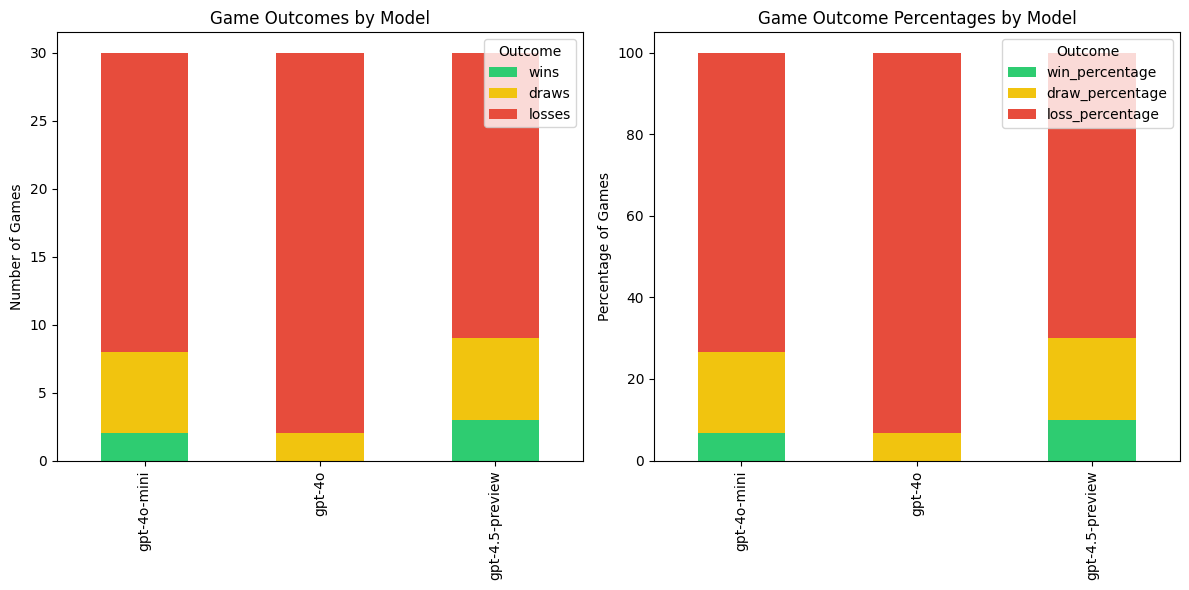

In [7]:
# Create a stacked bar chart for the raw counts
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
results_df[['wins', 'draws', 'losses']].plot(kind='bar', stacked=True, ax=ax1, 
                                           color=['#2ecc71', '#f1c40f', '#e74c3c'])
ax1.set_title('Game Outcomes by Model')
ax1.set_ylabel('Number of Games')
ax1.set_xlabel('')
ax1.legend(title='Outcome')

# Create a second bar chart for percentages
ax2 = plt.subplot(1, 2, 2)
results_df[['win_percentage', 'draw_percentage', 'loss_percentage']].plot(kind='bar', stacked=True, ax=ax2,
                                                                       color=['#2ecc71', '#f1c40f', '#e74c3c'])
ax2.set_title('Game Outcome Percentages by Model')
ax2.set_ylabel('Percentage of Games')
ax2.set_xlabel('')
ax2.legend(title='Outcome')

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

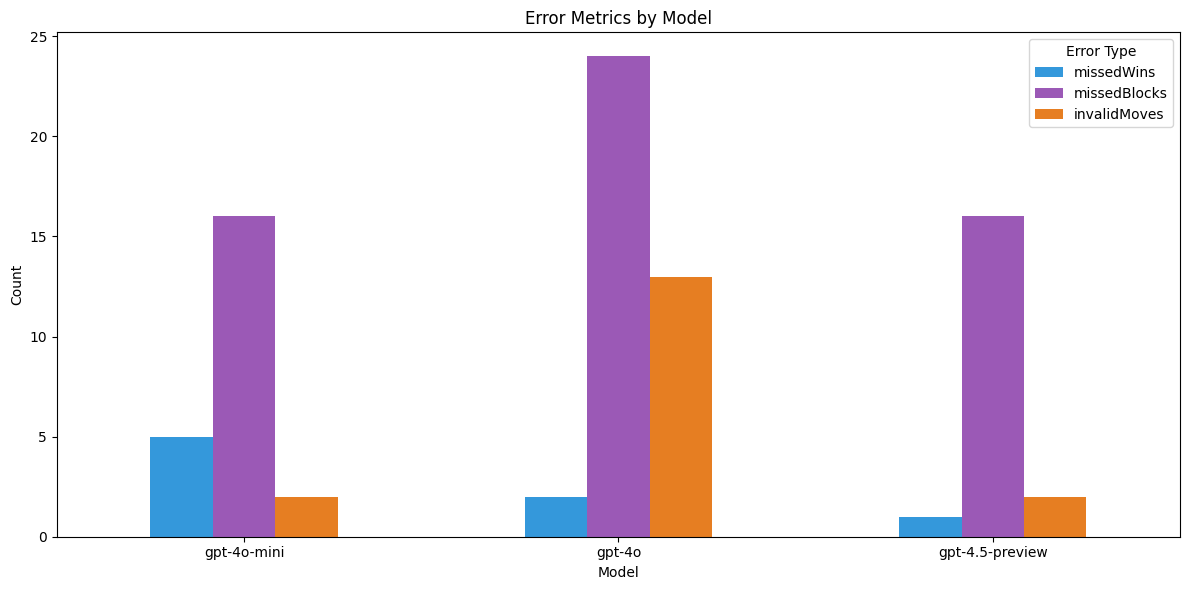

In [8]:
# Bar chart of stats
plt.figure(figsize=(12, 6))
stats_df.plot(kind='bar', figsize=(12, 6), color=['#3498db', '#9b59b6', '#e67e22'])
plt.title('Error Metrics by Model')
plt.ylabel('Count')
plt.xlabel('Model')
plt.legend(title='Error Type')
plt.xticks(rotation=0)
plt.tight_layout()

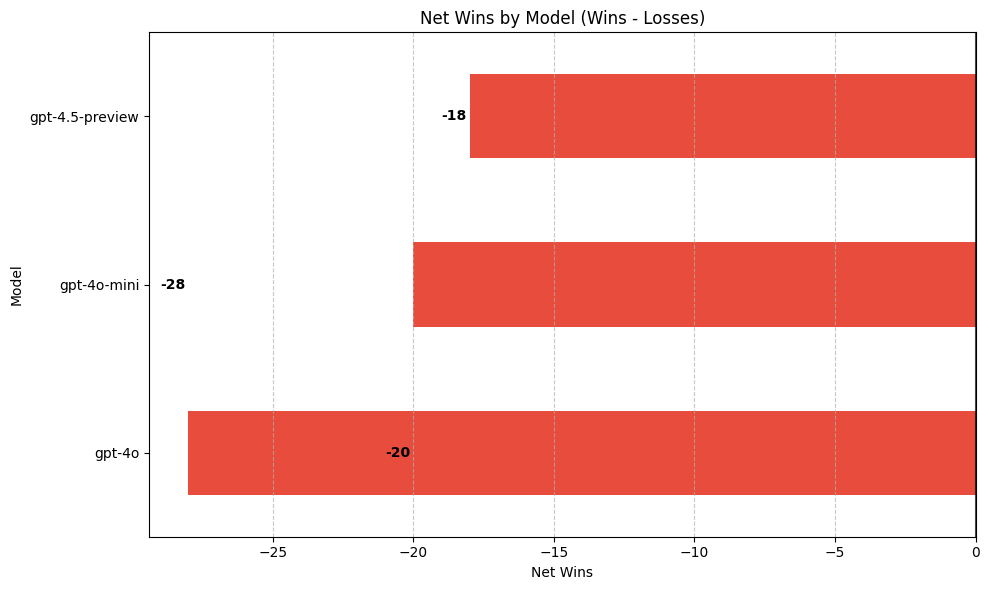

In [9]:
# Calculate net wins (wins - losses)
results_df['net_wins'] = results_df['wins'] - results_df['losses']

# Horizontal bar chart for net wins
plt.figure(figsize=(10, 6))
ax = results_df['net_wins'].sort_values().plot(kind='barh', color=results_df['net_wins'].map(lambda x: '#e74c3c' if x < 0 else '#2ecc71'))
plt.axvline(x=0, color='black', linestyle='-', alpha=0.7)
plt.title('Net Wins by Model (Wins - Losses)')
plt.xlabel('Net Wins')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels to the bars
for i, v in enumerate(results_df['net_wins']):
    plt.text(v - 1 if v < 0 else v + 0.5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()

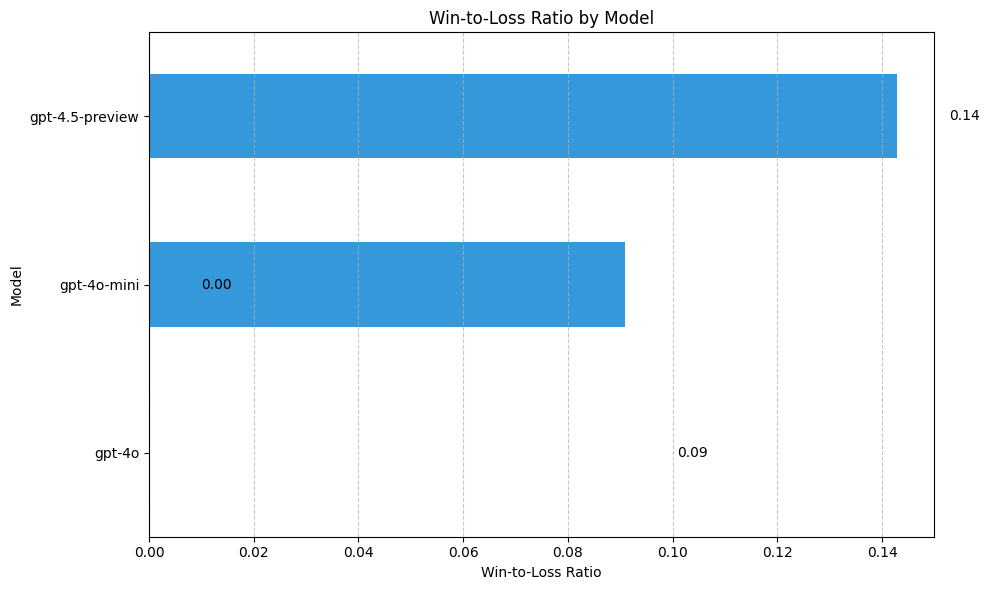

In [10]:
# Calculate win-to-loss ratio (avoiding division by zero)
results_df['win_loss_ratio'] = results_df['wins'] / results_df['losses'].replace(0, float('nan'))

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = results_df['win_loss_ratio'].sort_values().plot(kind='barh', color='#3498db')
plt.title('Win-to-Loss Ratio by Model')
plt.xlabel('Win-to-Loss Ratio')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels to the bars
for i, v in enumerate(results_df['win_loss_ratio']):
    if not np.isnan(v):
        plt.text(v + 0.01, i, f"{v:.2f}", va='center')
    else:
        plt.text(0.01, i, "0.00", va='center')

plt.tight_layout()

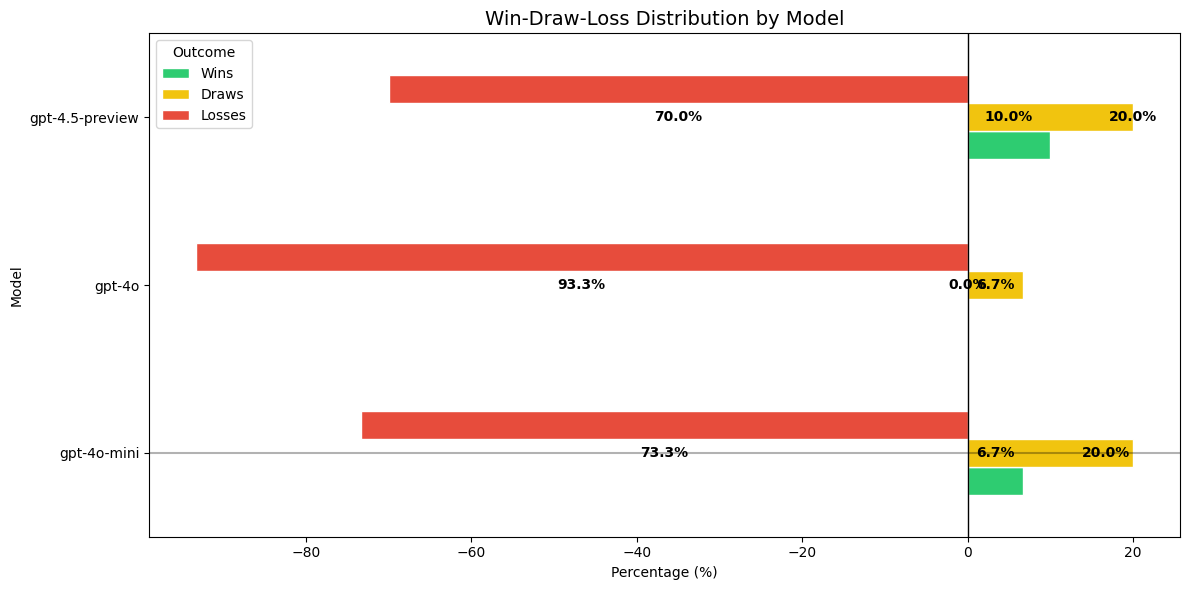

In [11]:
# Create a DataFrame just for plotting
plot_df = pd.DataFrame({
    'Wins': results_df['win_percentage'],
    'Draws': results_df['draw_percentage'],
    'Losses': 0 - results_df['loss_percentage']  # Negative to show below the line
})

# Create a diverging bar chart
fig, ax = plt.subplots(figsize=(12, 6))
plot_df.plot(kind='barh', ax=ax, color=['#2ecc71', '#f1c40f', '#e74c3c'], edgecolor='white')
ax.axvline(0, color='black', lw=1)
ax.set_title('Win-Draw-Loss Distribution by Model', fontsize=14)
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Model')

# Fix the y-tick labels
ax.set_yticklabels(plot_df.index)

# Add a horizontal line at y=0
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Customize the legend
ax.legend(title='Outcome')

# Add percentage labels
for i, model in enumerate(plot_df.index):
    # Add win percentage label
    win_pct = plot_df.loc[model, 'Wins']
    ax.text(win_pct/2, i, f"{win_pct:.1f}%", ha='center', va='center', fontweight='bold')
    
    # Add draw percentage label
    draw_pct = plot_df.loc[model, 'Draws']
    ax.text(draw_pct + win_pct - draw_pct/2, i, f"{draw_pct:.1f}%", ha='center', va='center', fontweight='bold')
    
    # Add loss percentage label (make the value positive for the label)
    loss_pct = abs(plot_df.loc[model, 'Losses'])
    ax.text(plot_df.loc[model, 'Losses']/2, i, f"{loss_pct:.1f}%", ha='center', va='center', fontweight='bold')

plt.tight_layout()

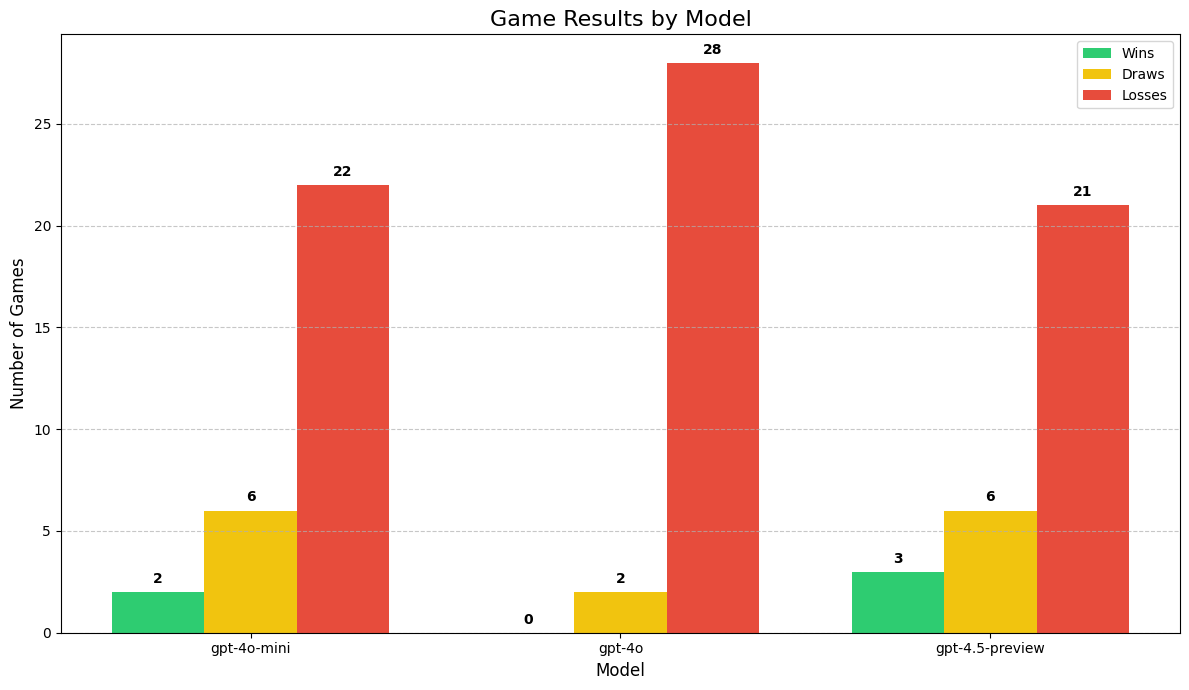

In [14]:
# Prepare data for clustered bar chart
plot_data = results_df[['wins', 'draws', 'losses']]

# Set figure size
plt.figure(figsize=(12, 7))

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(plot_data.index))

# Create bars
plt.bar(index - bar_width, plot_data['wins'], bar_width, 
        color='#2ecc71', label='Wins')
plt.bar(index, plot_data['draws'], bar_width, 
        color='#f1c40f', label='Draws')
plt.bar(index + bar_width, plot_data['losses'], bar_width, 
        color='#e74c3c', label='Losses')

# Customize the chart
plt.xlabel('Model', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Game Results by Model', fontsize=16)
plt.xticks(index, plot_data.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on each bar
for i, model in enumerate(plot_data.index):
    # Label wins
    plt.text(i - bar_width, plot_data.loc[model, 'wins'] + 0.3, 
             str(plot_data.loc[model, 'wins']), 
             ha='center', va='bottom', fontweight='bold')
    
    # Label draws
    plt.text(i, plot_data.loc[model, 'draws'] + 0.3, 
             str(plot_data.loc[model, 'draws']), 
             ha='center', va='bottom', fontweight='bold')
    
    # Label losses
    plt.text(i + bar_width, plot_data.loc[model, 'losses'] + 0.3, 
             str(plot_data.loc[model, 'losses']), 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

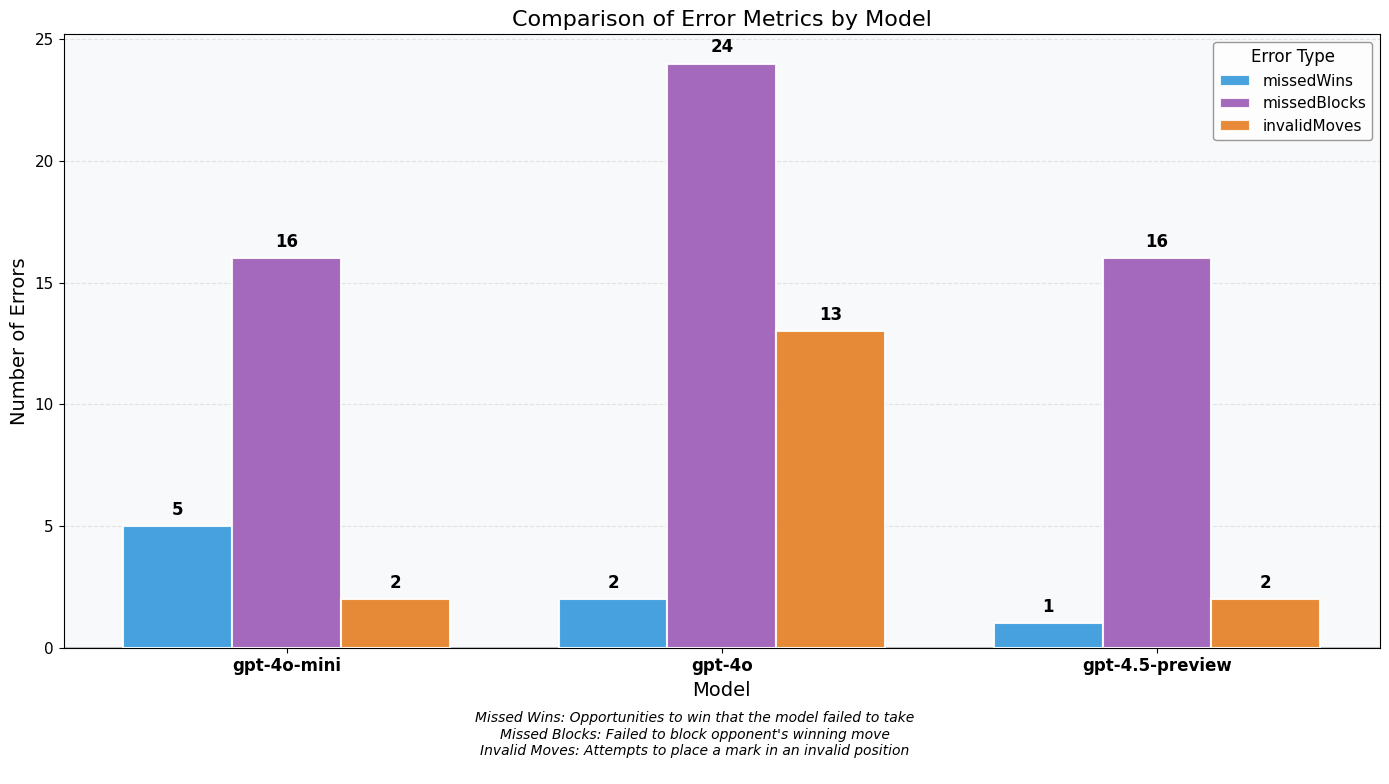

In [21]:
import re

# Enhanced version with better styling
plt.figure(figsize=(14, 8))

# Create a custom color palette for error metrics
colors = {'missedWins': '#3498db', 'missedBlocks': '#9b59b6', 'invalidMoves': '#e67e22'}

# Set up the positions
index = np.arange(len(stats_df.index))
bar_width = 0.25

# Create bars with a slight shadow for depth
for i, column in enumerate(['missedWins', 'missedBlocks', 'invalidMoves']):
    position = index + (i - 1) * bar_width
    bars = plt.bar(position, stats_df[column], bar_width, 
            color=colors[column], 
            label=column,  # Convert camelCase to spaced words
            edgecolor='white', linewidth=1.5,
            alpha=0.9, zorder=3)
    
    # Add data labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                 f'{height:.0f}', ha='center', va='bottom', 
                 fontweight='bold', fontsize=12)

# Customize the chart appearance
plt.xlabel('Model', fontsize=14)
plt.ylabel('Number of Errors', fontsize=14)
plt.title('Comparison of Error Metrics by Model', fontsize=16)
plt.xticks(index, stats_df.index, fontsize=12, fontweight='bold')
plt.yticks(fontsize=11)

# Add a subtle grid only on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)

# Customize the legend
plt.legend(title='Error Type', title_fontsize=12, fontsize=11, 
           frameon=True, facecolor='white', edgecolor='gray',
           loc='upper right')

# Add subtle background color
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().set_facecolor('white')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.2)

# Add a footnote explaining the metrics
explanation = """
Missed Wins: Opportunities to win that the model failed to take
Missed Blocks: Failed to block opponent's winning move
Invalid Moves: Attempts to place a mark in an invalid position
"""
plt.figtext(0.5, 0.01, explanation, ha="center", fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.08, 1, 0.98])